# Problem Statement

### The goal of this task is to create and evaluate a Naïve Bayesian classifier that can read a data and decide if it is positive or negative.The goal of this task is to evaluate and optimise the performance of different classifiers for theirsuitability to classify a given dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv(r"C:\Users\Ritesh\Downloads\archive (16)\Corona_NLP_train.csv",encoding='latin-1')
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [3]:
test_df = pd.read_csv(r"C:\Users\Ritesh\Downloads\archive (16)\Corona_NLP_test.csv")
test_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [4]:
train_df.shape,test_df.shape

((41157, 6), (3798, 6))

In [5]:
train_df.groupby('Location')['OriginalTweet'].value_counts()

Location                           OriginalTweet                                                                                                                                                                                                                                                                            
                                   10 things you need to know about Indian real estate in the aftermath of coronavirus.\r\r\n\r\r\nWhy real estate prices will fall but may not crash.\r\r\n\r\r\n#EconomicSlowdown #Coronavirus #Pandemic #RealEstate\r\r\n\r\r\nhttps://t.co/gRiDFLuVGv\r\r\n\r\r\nMy column @newslaundry.    1
                                   FF1 ObjectÂ
Coming in Close\r\r\nCLOSE APPROACH\r\r\nhttps://t.co/H1u8iwA59E\r\r\nhttps://t.co/jgVxRXCA8q\r\r\nWATCH CA https://t.co/nJnFm6Hvwh                                                                                                                                              1
                                   How 

### Data Visualisations

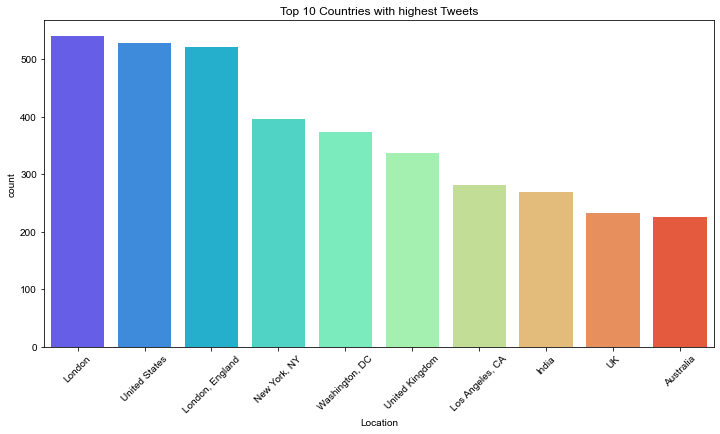

In [6]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries with highest Tweets')
countries =sns.countplot(x='Location', data=train_df, order=train_df['Location'].value_counts().index[:10], palette='rainbow')
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.style.use('seaborn-whitegrid')
plt.show() 

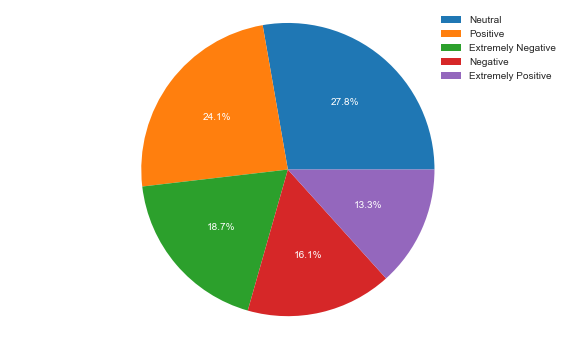

In [7]:
plt.figure(figsize=(10,6))
plt.pie(train_df['Sentiment'].value_counts(), labels=train_df['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

In [8]:
train_df.describe(include=object)

,Location,TweetAt,OriginalTweet,Sentiment
count,32567,41157,41157,41157
unique,12220,30,41157,5
top,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,540,3448,1,11422


In [9]:
train_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [10]:
train_df = train_df[['OriginalTweet','Sentiment']]
train_df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [11]:
test_df = test_df[['OriginalTweet','Sentiment']]
test_df.head(2)

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive


In [12]:
train_df['OriginalTweet'][5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [13]:
train_df['Sentiment'][5]

'Positive'

In [14]:
train_df.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [15]:
test_df.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [16]:
target_mapping={'Extremely Negative':0, 'Negative':0, 'Neutral':1,
                'Positive':2, 'Extremely Positive':2}
train_df['SentimentMapped']=train_df['Sentiment'].map(lambda x:target_mapping[x])
test_df['SentimentMapped']=test_df['Sentiment'].map(lambda x:target_mapping[x])

train_df.head()

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_11656\2405484670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['SentimentMapped']=train_df['Sentiment'].map(lambda x:target_mapping[x])
C:\Users\Ritesh\AppData\Local\Temp\ipykernel_11656\2405484670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['SentimentMapped']=test_df['Sentiment'].map(lambda x:target_mapping[x])


,OriginalTweet,Sentiment,SentimentMapped
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1
1,advice Talk to your neighbours family to excha...,Positive,2
2,Coronavirus Australia: Woolworths to give elde...,Positive,2
3,My food stock is not the only one which is emp...,Positive,2
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [18]:
def preproccesor(data):
    corpus = []
    for i in range(len(data)):
        #remove urls
        tweet1= re.sub(r'http\S+', ' ', data['OriginalTweet'][i])
        #remove html tags
        tweet2 = re.sub(r'<.*?>',' ', tweet1) 
        #remove digits
        tweet3 = re.sub(r'\d+',' ', tweet2)
        #remove hashtags
        tweet4 = re.sub(r'#\w+',' ', tweet3)
        review = re.sub('[^a-zA-Z]', ' ', tweet4)
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if word not in all_stopwords]
        review = ' '.join(review)
        corpus.append(review)
    return corpus  

In [19]:
corpus_train = preproccesor(train_df)
corpus_test = preproccesor(test_df)

In [20]:
corpus_train[:10]

['menyrbi phil gahan chrisitv',
 'advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med not order',
 'coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak',
 'food stock not one empti pleas panic enough food everyon not take need stay calm stay safe franc',
 'readi go supermarket outbreak not paranoid food stock litterali empti seriou thing pleas panic caus shortag',
 'news region first confirm covid case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good tim dodson report',
 'cashier groceri store share insight prove credibl comment civic class know talk',
 'supermarket today buy toilet paper',
 'due covid retail store classroom atlanta not open walk busi class next two week begin monday march continu process onlin phone order normal thank understand',
 'corona prevent stop buy thi

In [21]:
corpus_test[:10]

['trend new yorker encount empti supermarket shelv pictur wegman brooklyn sold onlin grocer foodkick maxdeliveri fear shopper stock',
 'find hand sanit fred meyer turn pack purel check concern drive price',
 'find protect love one',
 'buy hit citi anxiou shopper stock food amp medic suppli worker becom st confirm patient stage event',
 'news newsmelb one week everyon buy babi milk powder next everyon buy toilet paper',
 'rememb last time paid gallon regular ga lo angel price pump go look impact price pm abc',
 'vote age hand sanit',
 'drtedro stop without protect price surgic mask increas six fold n respir trebl amp gown cost twice much drtedro',
 'hi twitter pharmacist sell hand sanit live exist like mask sold fuck everywher worri use soap visit twenti pharmaci look last bottl pharmaci full sick peopl',
 'anyon supermarket last day went normal shop last night amp sight greet barmi btw special tin tomato']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)
X_train = cv.fit_transform(corpus_train).toarray()
y_train = train_df['SentimentMapped']
X_test = cv.transform(corpus_test).toarray()
y_test = test_df['SentimentMapped']

In [23]:
X_train.shape

(41157, 10000)

In [24]:
y_train.shape

(41157,)

In [25]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_test,y_pred)
score

0.6898367561874671

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [33]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_test,y_pred)
score

0.7501316482359136

In [35]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

C:\Users\Ritesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8133228014744602

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1298  125  210]
 [  67  469   83]
 [ 149   75 1322]]


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1633
           1       0.70      0.76      0.73       619
           2       0.82      0.86      0.84      1546

    accuracy                           0.81      3798
   macro avg       0.79      0.80      0.80      3798
weighted avg       0.82      0.81      0.81      3798

